尽管图像中包含丰富的信息，但仅从一幅图像无法直接获得 **沿着某条投影线上的点的深度**，至少需要两幅图像，才可以通过 **三角测量** 的方法得到点的深度。本章的目标是了解同一个场景中多个视角的三维约束以及相关的摄像机配置。

在双目立体视觉中，任何一点的第一个像点必定位于它的第二个像点和两个摄像机的光学中心所形成的平面上。在摄像机的内部参数和基本矩阵已知的情况下，这种外极约束可以用代数方法描述为一个 $3 \times 3$ 矩阵，称为 *本征矩阵*。

不需要任何摄像机和场景的信息，就能够建立同一场景特征的多个像所满足的方程。本章将介绍一些直接根据成像数据估计它们参数的方法。

# 5.1 外极几何(epipolar geometry)

*多视图几何(multiple view geometry)* 利用不同视点所拍摄图像间的关系，来研究照相机之间或者特征之间的关系，其中最重要的是双视图几何。图像特征通常使用兴趣点。

*外极几何(epipolar geometry)* 描述一个场景的两个视图中对应图像点的几何关系约束，这些约束由三部分决定：

* 照相机间的空间相对位置关系
* 照相机的性质
* 三维场景点的位置

考虑一点 P，通过光学中心点分别在 O 和 O' 两个摄像机所成的像为 p 和 p'。这 5 个点都位于两条相交光线 OP 和 O'P 所形成的 *外极平面* 上。点 p' 位于该平面与第二台摄像机的视平面 $\Pi'$ 的交线 l' 上。直线 l' 是与点 p 相关联的 *外极线*，它经过 e'。e' 是连接两个光学中心 O 和 O' 的 *基线* 和平面 $\Pi'$ 的交点。同样，点 p 位于与点 p' 关联的直线 l 上，且该直线经过基线和平面 $\Pi$ 的交点 e。

<img src='statics/ch05-epipolar-geometry.png' width='50%'/>

点 e 和 e' 称为两个摄像机的 *外极点* ，外极点 e' 是第二个摄像机观察到的图像中第一个摄像机的光学中心 O 的投影，反之亦然。如果 p 和 p' 是同一个点的不同像点，那么 p' 一定位于与 p 相关联的外极线上，这种 *外极线约束* 是立体视觉和运动分析中的基本原理。

### 照相机间的空间相对位置关系

如果没有照相机的先验知识，会出现固有二义性，用照相机方程表示为：

$$ \lambda x = PX = (PH^{-1})(HX) = \hat P \hat X $$

因此，分析双视图几何时，需要将照相机间的空间位置相对关系由单应性矩阵表示。通常只做刚体变换，即通过单应矩阵变换了坐标系。

将原点的坐标轴与第一个照相机对齐...TODO

### 照相机的性质

同一个图像点经过不同的投影矩阵产生的不同投影点必须满足外极约束条件。

    Q: 外极约束条件的推导
 
由投影图像点计算出 F -> 由 F 恢复照相机参数 -> 度量重建


### 三维场景点的位置

给定图像中的一个点 $x_2$，利用 $x_2^T F x_1 = 0$ 可以找到对应第一幅图像的一条直线 $x_2^T F x_1 = l_1^T x_1 = 0$，这条线称为 *外极线*，点 $x_2$ 在第一幅图像中的对应点一定在这条直线上。所以，基础矩阵可以将对应点的搜索限制在外极线上。

    Q：上文由投影点计算 F，这里由 F 限制图像点的搜索，前后关系是相反的？
    
外极线都经过一点 e，称为 *外极点*。外极点是另一个照相机光心对应的图像点。其有以下性质：

* 外极点可以在我们看到的图像外，这取决于照相机的相对方向。 
* 因为外极点在所有的外极线上，所以 $ F e_1 = 0 $。因此，可通过计算 F 的零向量来计算出外极点。同理，另一个外极点可以通过计算 $ e_2^T F = 0 $ 得到。


图 5-1

    Q: 另一个外极点可以通过 e_2^T F = 0 得到？为什么不是 F^T ？
    Q: 什么情况下，外极点在 **看到的** 图像外？
  


## 5.1.1 一个简单的数据集

这里使用牛津多视图数据集，这是一个带有图像点、三维点和照相机参数矩阵的数据集，可从 https://www.robots.ox.ac.uk/~vgg/data/mview/ 下载。

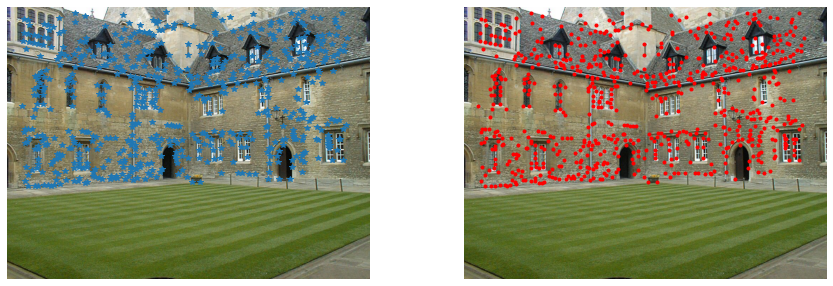

In [1]:
'''可视化这些数据：将三维的点投影到一个视图，然后和观测到的图像点比较'''

from numpy import *
from pylab import *
from tools.load_vggdata import load_vggdata

im1, im2, points2D, points3D, corr, P = load_vggdata()

# 将三维点转换成齐次坐标，并投影
X = vstack((points3D, ones(points3D.shape[1])))
x = P[0].project(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].imshow(im1)
axes[0].plot(points2D[0][0], points2D[0][1], '*')
axes[0].axis('off')

axes[1].imshow(im1)
axes[1].plot(x[0], x[1], 'r.')
axes[1].axis('off')

show()

第二幅图（投影得到的图）比第一幅图多一些点，这些多出的点是从视图 2 和视图 3 重建出来的，而不在视图 1 中。如第二排窗户最右侧。

    Q：通过投影可以重建不在视图 1 的点？

## 5.1.2 用 Matplotlib 绘制三维数据

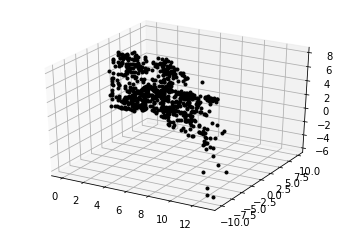

In [2]:
# %matplotlib qt

fig = figure()
# get the current 3d ax
ax = fig.gca(projection='3d')
_ = ax.plot(points3D[0], points3D[1], points3D[2], 'k.')

# %matplotlib inline

## 5.1.3 计算 F：八点法

*八点法* 是通过 8 对对应点来计算基础矩阵的算法。

外极约束 

$$ \mathbf x_2^T F \mathbf x_1 
  = \begin{bmatrix} x_2 & y_2 & w_2 \end{bmatrix}
    \begin{bmatrix}
      F_{11} & F_{12} & F_{13} \\
      F_{21} & F_{22} & F_{23} \\
      F_{31} & F_{32} & F_{33}
    \end{bmatrix}
    \begin{bmatrix} x_1 \\ y_1 \\ w_1 \end{bmatrix}
  = 0
  $$

可以写成线性系统的形式：

$$ \begin{bmatrix}
    x_2^1 x_1^1 & x_2^1 y_1^1 ... w_2^1 w_1^1 \\
    ... \\
    x_2^n x_1^n & x_2^n y_1^n ... w_2^n w_1^n
   \end{bmatrix}
   \begin{bmatrix} F_{11} \\ F_{12} \\ F_{13} \\ ... \\ F_{33} \end{bmatrix}
 = \mathbf A \mathbf f
 = 0
$$

基础矩阵中包含 9 个元素，由于尺度是任意的，所以只需要 8 个方程。
    
通常用 SVD 算法来计算最小二乘解，即最小化 $||\mathbf A \mathbf f||$。由于得出的解可能秩不为2（基础矩阵 F 的秩小于等于 2），所以将最后一个奇异值置 0 来得到秩最接近 2 的基础矩阵。实现在 `tools.sfm.compute_fundamental` 中。

    Q：为什么希望得到秩为 2 的基础矩阵？为什么将最后一个奇异值置 0 可以得到秩最接近 2 的基础矩阵？

## 5.1.4  外极点和外极线

外极点满足 $\mathbf F \mathbf e_1 = 0$，因此可以通过计算 F 的零空间来得到外极点。实现在 `tools.sfm.compute_epipole`. 

如果想得到另一幅图像的外极点（对应左零空间的外极点），由外极约束条件两侧转置 $x_1^T F^T x_2 = 0$ 可知，只需将 $F^T$ 输入即可。

    Q: 没理解外极点的作用是什么？

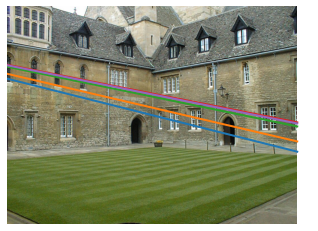

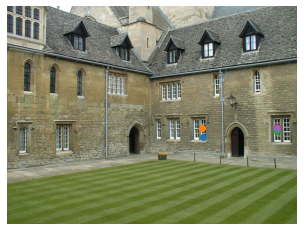

In [3]:
'''在之前样本数据集的前两个视图上运行 compute_fundamental 和 compute_epipole'''
from tools import sfm
from importlib import reload
reload(sfm)

# 在前两个视图中点的索引
ndx = (corr[:,0]>=0) & (corr[:,1]>=0)

# 获得坐标，并将其用齐次坐标表示
x1 = points2D[0][:, corr[ndx,0]]
x1 = vstack((x1, ones(x1.shape[1])))
x2 = points2D[1][:, corr[ndx, 1]]
x2 = vstack((x2, ones(x2.shape[1])))

# 计算 F
F = sfm.compute_fundamental(x1, x2)
# 计算极点
e = sfm.compute_epipole(F)

# 绘制图像
figure()
imshow(im1)

# 分别绘制每条外极线
for i in range(5):
    sfm.plot_epipolar_line(im1, F, x2[:,i], e, False)
axis('off')

figure()
imshow(im2)

# 分别绘制每个外极点
for i in range(5):
    plot(x2[0, i], x2[1, i], 'o')
axis('off')

show()

从图中可以看到，外极线在图像左侧将相交于一点。线和点之间颜色的匹配，表明点的对应点可以在另外一幅图像中找到。

    Q: 代码中，为什么外极线是 F*x = 0，而不是 $x_2^T F x_1 = 0$ ?

# 5.2 照相机和三维结构的计算

## 5.2.1 三角剖分

给定照相机参数模型，图像点的三维位置可以通过 *三角剖分* 来恢复。

对于两个照相机 P1 和 P2，三维实物点 X 的投影点为 x1 和 x2 (齐次坐标表示)，由照相机方程可知如下关系：

$$ \begin{bmatrix} P_1 &  - \mathbf x_1 & 0 \\ P_2 & 0 & - \mathbf x_2 \end{bmatrix}
   \begin{bmatrix} \mathbf X \\ \lambda_1 \\ \lambda_2 \end{bmatrix}
   = 0
$$

由于图像噪声、照相机参数和其他系统误差，该方程可能无精确解。可通过 SVD 算法来得到三维点的 **最小二乘估计** 。算法实现在 `tools.sfm.triangulate_point/triangulate` 中。

[[ 1.03743725  1.56125273  1.40720017]
 [-0.57574987 -0.55504127 -0.46523952]
 [ 3.44173797  3.44249282  7.53176488]
 [ 1.          1.          1.        ]]
[[ 1.0378863   1.5606923   1.4071907 ]
 [-0.54627892 -0.5211711  -0.46371818]
 [ 3.4601538   3.4636809   7.5323397 ]
 [ 1.          1.          1.        ]]


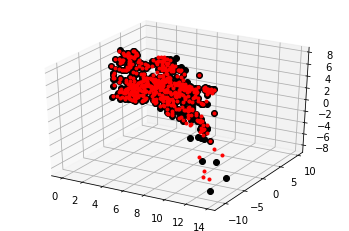

In [4]:
'''实现 Merton1 数据集上的三角剖分'''
from mpl_toolkits.mplot3d import axes3d
reload(sfm)

# 前两个视图中的索引
ndx = (corr[:,0]>=0) & (corr[:,1]>=0)

# 获取坐标，并用齐次坐标表示
x1 = points2D[0][:, corr[ndx, 0]]
x1 = vstack((x1, ones(x1.shape[1])))
x2 = points2D[1][:, corr[ndx, 1]]
x2 = vstack((x2, ones(x1.shape[1])))

Xtrue = points3D[:,ndx]
Xtrue = vstack((Xtrue, ones(Xtrue.shape[1])))

# 检查前三个点
Xest = sfm.triangulate(x1, x2, P[0].P, P[1].P)
print (Xest[:,:3])
print (Xtrue[:, :3])

# 绘制图像
fig = figure()
ax = fig.gca(projection='3d')
ax.plot(Xest[0], Xest[1], Xest[2], 'ko')
ax.plot(Xtrue[0], Xtrue[1], Xtrue[2], 'r.')
#axis('equal')

show()

## 5.2.2 由三维点计算照相机矩阵

已知三维点及其头像投影，可以使用直接线性变换的方法来计算照相机矩阵 P。本质上，这是三角剖分的逆问题，有时称其为 *照相机反切法*。利用该方法恢复照相机矩阵同样也是一个最小二乘问题。

由照相机方程，每个三维点 $X_i$（齐次坐标下）按照 $\lambda_i \mathbf x_i = \mathbf P \mathbf X_i$  投影到图像点 $\mathbf x_i = [x_i, y_i, 1]$，相应点满足关系：

$$ \begin{bmatrix}
    \mathbf X_1^T & 0 & 0 & -x_1 & 0 & 0 & ... \\
    0 & \mathbf X_1^T & 0 & -y_1 & 0 & 0 & ... \\
    0 & 0 & \mathbf X_1^T & -1 & 0 & 0 & ... \\
    \mathbf X_2^T & 0 & 0 & 0 & -x_2 & 0 & ... \\
    0 & \mathbf X_2^T & 0 & 0 & -y_2 & 0 & ... \\
    0 & 0 & \mathbf X_2^T & 0 & -1 & 0 & ... \\
    ...
   \end{bmatrix}
$$

其中 $\mathbf p_1, \mathbf p_2, \mathbf p_2$ 是矩阵 $\mathbf P$ 的三行。

然后可以使用 SVD 分解估计出照相机矩阵。算法实现在 `tools.sfm.compute_P` 中。


[[ 1.06520794e+00 -5.23431275e+01  2.06902749e+01  5.08729305e+02]
 [-5.05773115e+01 -1.33243276e+01 -1.47388537e+01  4.79178838e+02]
 [ 3.05121915e-03 -3.19264684e-02 -3.43703738e-02  1.00000000e+00]]
[[ 1.06774679e+00 -5.23448212e+01  2.06926980e+01  5.08764487e+02]
 [-5.05834364e+01 -1.33201976e+01 -1.47406641e+01  4.79228998e+02]
 [ 3.06792659e-03 -3.19008054e-02 -3.43665129e-02  1.00000000e+00]]


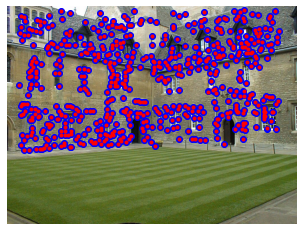

In [5]:
'''在样本数据集上测试算法的性能'''

from tools import camera
reload(sfm)

# 选出视图1中的一些可见点，并用齐次坐标表示
corr0 = corr[:, 0] # 视图1
ndx3D = where(corr0>=0)[0]
ndx2D = corr0[ndx3D]

x = points2D[0][:, ndx2D] # 视图1
x = vstack((x, ones(x.shape[1])))
X = points3D[:, ndx3D]
X = vstack((X, ones(X.shape[1])))

# 估计 P
Pest = camera.Camera(sfm.compute_P(x, X))

# 比较估计的照相机矩阵 Pest 和创建者给出的照相机矩阵 P，使用归一化格式（除以最后一个元素）
print(Pest.P / Pest.P[2,3]) 
print(P[0].P / P[0].P[2,3])

# 用估计的照相机矩阵投影三维点，然后和真是图像点比较
xest = Pest.project(X)

figure()
imshow(im1)
plot(x[0], x[1], 'bo')
plot(xest[0], xest[1], 'r.')
axis('off')

show()

## 5.2.3 由基础矩阵计算照相机矩阵

在两个视图的场景中，照相机矩阵可以由基础矩阵恢复出来。假设第一个照相机矩阵归一化为 $P_1=[I|0]$，现在计算第二个照相机矩阵 $P_2$。

### 1. 未标定的情况——投影重建

在没有任何照相机内参数知识的情况下，照相机矩阵或者三维点的重建只能通过射影变换恢复出来（可以得到整个投影场景中无畸变的重建点）。这里不考虑角度和距离。
    
$$ P_2 = [S_e F | \mathbf e] $$

其中，$\mathbf e$ 是左极点，满足 $\mathbf e^T F = 0$， $S_e$ 是外极约束条件中的反对称矩阵

$$ S_e = \begin{bmatrix}
            0 & -t_3 & -t_2 \\
            t_3 & 0 & -t_1 \\
            -t_2 & t_1 & 0
        \end{bmatrix} $$
        
代码实现在 `tools.sfm.compute_P_from_fundamental` 。注意，使用该矩阵做出的三角形剖分很有可能会发生畸变，如倾斜的重建。

    Q: 照相机矩阵或者三维点的重建只能通过射影变换恢复出来？
    Q：不考虑角度和距离是什么意思？和使用自由向量有关吗？
    Q：为什么使用该矩阵做出的三角形剖分很有可能发生畸变？
    
### 2. 已标定的情况——度量重建

在已标定的情况下，重建会保持欧式空间中的一些度量特性（除了全局的尺度参数）。

    Q: 为什么在已标定的情况下，重建会保持度量特性？

给定标定矩阵 K，可以将它的逆 $K^{-1}$ 作用于图像点 $x_k = K^{-1} x$，因此，在新的图像坐标下，照相机方程变为：

$$ \mathbf x_k = K^{-1}K[R|t]X = [R|t]X $$

在新的图像坐标系下，点同样满足之前的基础矩阵方程：

$$ x_{k_2}^T F x_{k_1} = 0 $$

在归一化的坐标系下，基础矩阵称为 *本质矩阵*。为了区别标定后的情况，以及归一化了的图像坐标，通常将其记为 E，而非 F。

    Q: ”在新的图像坐标系下“ 指经过 K^{-1} 线性变换的坐标系吗？
    Q: "在归一化的坐标系下" 又是什么坐标系？和 K^{-1} 变换后的是同一个吗？

从本质矩阵恢复出的照相机矩阵中存在度量关系，但有 4 个可能解。因为只有一个解产生位于两个照相机前的场景，所以可以轻松地从中选出来。计算 4 个解的的算法实现在 `tools.sfm.compute_P_from_essential` 中。

    Q: 从本质矩阵恢复照相机矩阵算法的细节



# 5.3 多视图重建

使用上面的理论可以从多幅图像中计算出真实的三维重建。由于照相机的运动提供了三维结构，所以这样计算三维重建的方法称为 SfM（Structure from Motion，从运动中恢复结构）。

假设照相机已经标定，计算重建可以分为 4 个步骤：

1. 检测特征点，然后在两幅图像间匹配；
2. 由匹配计算基础矩阵；
3. 由基础矩阵计算照相机矩阵；
4. 三角剖分这些三维点。

其中步骤 2，当图像间的点对应包含不正确的匹配时，需要一个稳健的方法来计算基础矩阵。

## 5.3.1 稳健估计基础矩阵

类似于稳健计算单应性矩阵，当存在噪声和不正确的匹配时，使用 RANSAC 方法，同时这里结合了八点算法。注意，八点算法在平面场景中会失效，如果场景点都位于平面上，就不能使用该算法。

算法实现在 `tools.sfm.RansacModel`、`tools.sfm.compute_fundamental_normalized` 和 `tools.sfm.F_from_ransac`。这里采用的错误衡量方法是 Sampson 距离。`fit()` 方法选择 8 个点，然后使用归一化的 8 点算法，将图像点归一化为零均值固定方差。

    Q: 八点算法在平面场景中会失效？
    Q: Sampson 距离？
    Q：将图像点归一化为零均值固定方差的方法？

## 5.3.2 三维重建示例

本节展示一个重建三维场景的完整例子。使用由已知标定矩阵的照相机拍摄的两幅图像。

In [6]:
'''首先，提取、匹配特征，然后估计基础矩阵和照相机矩阵。'''

from PIL import Image
from tools import homography
from tools import sfm
from tools import sift

# 标定矩阵
K = array([[2394,0,932], [0,2398,628], [0,0,1]])

# 载入图像，并计算特征
im1 = array(Image.open('data/alcatraz1.jpg'))
sift.process_image('data/alcatraz1.jpg', '/tmp/im1.sift')
l1, d1 = sift.read_features_from_file('/tmp/im1.sift')

im2 = array(Image.open('data/alcatraz2.jpg'))
sift.process_image('data/alcatraz2.jpg', '/tmp/im2.sift')
l2, d2 = sift.read_features_from_file('/tmp/im2.sift')

# 匹配特征
matches = sift.match_twosided(d1, d2)
ndx = matches.nonzero()[0]

# 使用齐次坐标表示，并使用 inv(K) 归一化
x1 = homography.make_homog(l1[ndx, :2].T)
ndx2 = [int(matches[i]) for i in ndx]
x2 = homography.make_homog(l2[ndx2, :2].T)

x1n = dot(inv(K), x1)
x2n = dot(inv(K), x2)

# 使用 RANSAC 方法估计 E。因为点已经归一化，所以这里返回本质矩阵
model = sfm.RansacModel()
E, inliers = sfm.F_from_ransac(x1n, x2n, model)

# 由本质矩阵计算照相机矩阵（P2 是 4 个解的列表）
P1 = array([[1,0,0,0], [0,1,0,0], [0,0,1,0]])
P2 = sfm.compute_P_from_essential(E)

In [7]:
'''从照相机矩阵列表中，挑选出经过三维剖分后，在两个照相机前均含有最多场景点的照相机矩阵'''

# 选取点在照相机前的解
ind = 0
maxres = 0
for i in range(4):
    # 三角剖分 inliers，并计算每个照相机的深度
    X = sfm.triangulate(x1n[:, inliers], x2n[:, inliers], P1, P2[i])
    # 将三角剖分后的 X 投影回图像后，深度的符号由每个图像点的第三个数值给出 TODO
    d1 = dot(P1, X)[2]
    d2 = dot(P2[i], X)[2]
    # 保存正向最大深度的索引
    if sum(d1>0) + sum(d2>0) > maxres:
        maxres = sum(d1>0) + sum(d2>0)
        ind = i
        # 由于所有估计中都存在噪声和误差，所以即便使用正确的照相机矩阵，也可能存在一些点仍位于某个照相机后面
        # 对于和最优解一致的点，用布尔量记录，以便取出在照相机前的点
        infront = (d1>0) & (d2>0)

# 三角剖分 inliers，并移除不在所有照相机前的点
X = sfm.triangulate(x1n[:, inliers], x2n[:, inliers], P1, P2[ind])
X = X[:, infront]

(-5.44670228773491, 10.188185134276598, -2.580531975520376, 28.228103936635925)

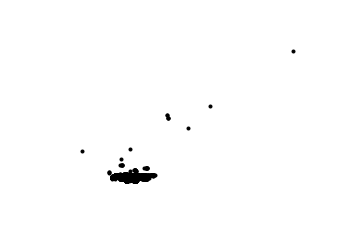

In [8]:
'''绘制出该三维重建'''

from mpl_toolkits.mplot3d import axes3d

fig = figure()
ax = fig.gca(projection='3d')
ax.plot(-X[0], X[1], X[2], 'k.') # TODO 和我们的坐标系相比，使用 mplot3d 绘制三维图像需要将第一个坐标值取相反数
axis('off')

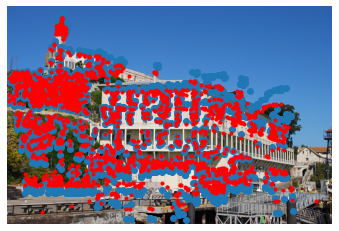

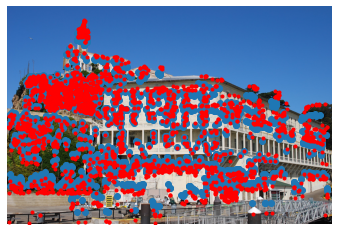

In [9]:
'''在每个视图中绘制出 X 的二次投影'''

from tools import camera

# project 3D points
cam1 = camera.Camera(P1)
cam2 = camera.Camera(P2[ind])
x1p = cam1.project(X)
x2p = cam2.project(X)

# reverse K normalization
x1p = dot(K, x1p)
x2p = dot(K, x2p)

figure()
imshow(im1)
gray()
plot(x1p[0], x1p[1], 'o')
plot(x1[0], x1[1], 'r.')
axis('off')

figure()
imshow(im2)
gray()
plot(x2p[0], x2p[1], 'o')
plot(x2[0], x2[1], 'r.')
axis('off')

show()

# 5.4 立体图像（Stereo Images）

一个多视图成像的特殊例子是 *立体视觉*（或者 *立体成像* ），其使用两台只有水平（sideways）偏移的照相机观测同一场景。当照相机设置为使两幅图像具有相同的图像平面，并且图像行 vertically aligned 时，称图像对是经过矫正的（rectified）。在机器人学中这样的照相机设置被称为 *立体平台*。

    Q: vertically aligned 的意思？

通过将图像扭曲到公共的平面上，使外极线位于图像行上，任何立体照相机设置都能得到矫正。

假设两幅图像经过了矫正，那么对应点的寻找限制在图像的同一行上。一旦找到对应点，由于深度是和偏移成正比的，那么深度(z坐标)可以直接由水平偏移来计算，

$$ Z = \frac {fb} {x_l - x_r}$$

    Q：深度是和偏移成正比的？
    Q：推导 Z 的计算公式

其中，f 是经过矫正图像的焦距，b 是两个照相机中心之间的距离，$x_l$ 和 $x_r$ 是左右两幅图像中对应点的 x 坐标。分开照相机中心的距离称为 *基线*。矫正后的立体照相机设置：

<img src='statics/ch05-rectified-stereo-image-setup.png' width='200px'/>

*立体重建（stereo reconstruction）* / *致密深度重建（dense depth reconstruction）* 就是恢复深度图（或者相反，视差图 disparity map），图像中每个像素的深度（或者视差）都需要计算出来。这是计算机视觉中的经典问题，有很多算法。下一节讲解基于归一化互相关的立体重建算法。

## 计算视差图

在计算立体重建算法中，对每个像素尝试不同的偏移，并按照局部图像周围归一化的互相关值，选择具有最好分数的偏移，然后记录下该最佳偏移。因为每个偏移在某种程度上对应于一个平面，所以该过程有时称为 *扫平面法* 。

    Q: 每个偏移在某种程度上对应于一个平面
    
归一化的互相关值，使用每个像素周围的图像块（周边局部图像）计算：
 
$$ ncc(I_1, I_2) = \frac {\sum_x (I_1(x) - \mu_1) (I_2(x) - \mu_2)}
                         {\sqrt {\sum_x(I_1(x) - \mu_1)^2 \sum_x(I_2(x) - \mu_2)^2}}
$$

三个求和操作是在局部图像块区域上进行的，可以使用图像滤波器来快速计算，`scipy.ndimage.filters` 模块中的 `uniform_filter()` 可以在一个矩形图像块中计算相加。

扫平面法的实现在 `tools.stereo.plan_sweep_ncc` 中。

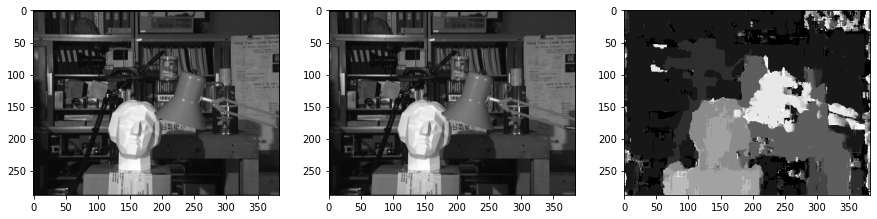

In [20]:
'''载入图像，计算偏移图'''

from scipy import misc
from tools import stereo
reload(stereo)

im_l = array(Image.open('data/tsukuba/scene1.row3.col3.ppm').convert('L'), 'f')
im_r = array(Image.open('data/tsukuba/scene1.row3.col4.ppm').convert('L'), 'f')

# 开始偏移，并设置步长
steps = 12
start = 4
# ncc 的宽度
wid = 9

res = stereo.plane_sweep_ncc(im_l, im_r, start, steps, wid)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(im_l)
axes[1].imshow(im_r)
axes[2].imshow(Image.fromarray(uint8(res)))